In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
customer_df = pd.read_csv('Wholesale_customers_data.csv')
customer_df.drop(['Channel', 'Region'], axis=1, inplace=True)

In [3]:
customer_df.shape

(440, 6)

In the next few notebooks, we are going to do some Unsupervised Exploration of the `customer` table in our Database.

> What does a data scientist do? PCA on the `customer` table. - Joshua Cook

# Basic Stats

In [8]:
from scipy.stats import skew

In [9]:
skew(customer_df)

array([  2.55258269,   4.03992212,   3.57518722,   5.88782573,
         3.61945758,  11.11353365])

In [10]:
import random 

random.sample(range(10), 2)

[4, 7]

In [34]:
stats = customer_df.describe().T
stats['skew'] = skew(customer_df)
stats

,count,mean,std,min,25%,50%,75%,max,skew
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,2.552583
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,4.039922
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,3.575187
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,5.887826
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3.619458
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,11.113534


# Sampling the Dataset 

In this notebook, we begin to explore the `customer` table by sampling the table. First, let's sample three random points and examine them. 

In [25]:
np.random.seed(42)

In [26]:
sample = customer_df.sample(3)

In [27]:
sample

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
265,5909,23527,13699,10155,830,3636
78,10766,1175,2067,2096,301,167
347,27380,7184,12311,2809,4621,1022


In [28]:

stats

,count,mean,std,min,25%,50%,75%,max,skew
Fresh,3.0,14685.000000,11259.213161,5909.0,8337.5,10766.0,19073.0,27380.0,0.561975
Milk,3.0,10628.666667,11567.293215,1175.0,4179.5,7184.0,15355.5,23527.0,0.498566
Grocery,3.0,9359.000000,6353.076735,2067.0,7189.0,12311.0,13005.0,13699.0,-0.669325
Frozen,3.0,5020.000000,4461.307095,2096.0,2452.5,2809.0,6482.0,10155.0,0.686842
Detergents_Paper,3.0,1917.333333,2356.336210,301.0,565.5,830.0,2725.5,4621.0,0.667224
Delicatessen,3.0,1608.333333,1807.299182,167.0,594.5,1022.0,2329.0,3636.0,0.533276


# Sampling for a Statistical Description

We are able to take the mean and standard deviation of the data, but what if we want to visualize it? 

Of course, this dataset is small, but we might want techniques that work even when the dataset is very large.

Let's start by looking at 1% of the data. 

In [29]:
sample_1pct_1 = customer_df.sample(5)

In [37]:
sample_1pct_1.mean()

Fresh               14123.6
Milk                 5801.0
Grocery              5475.8
Frozen               2812.6
Detergents_Paper     1097.8
Delicatessen         1987.6
dtype: float64

### How does this compare to the actual mean?

In [38]:
sample_1pct_1.mean() - stats['mean']

Fresh               2123.302273
Milk                   4.734091
Grocery            -2475.477273
Frozen              -259.331818
Detergents_Paper   -1783.693182
Delicatessen         462.729545
dtype: float64

Let's think about this in terms of the standard deviations.

In [39]:
(sample_1pct_1.mean() - stats['mean'])/stats['std']

Fresh               0.167885
Milk                0.000641
Grocery            -0.260490
Frozen             -0.053419
Detergents_Paper   -0.374108
Delicatessen        0.164082
dtype: float64

### How does it do?


### Let's try it again

In [40]:
sample_1pct_2 = customer_df.sample(5)

In [41]:
sample_1pct_2.mean() - stats['mean']

Fresh              -4642.897727
Milk               -2076.265909
Grocery            -1499.477273
Frozen              -295.131818
Detergents_Paper    -190.693182
Delicatessen        -253.670455
dtype: float64

In [42]:
(sample_1pct_2.mean() - stats['mean'])/stats['std']

Fresh              -0.367105
Milk               -0.281322
Grocery            -0.157787
Frozen             -0.060793
Detergents_Paper   -0.039996
Delicatessen       -0.089951
dtype: float64

### How does it do?

### Repeatedly Sample

Let's do it 10 times.

In [43]:
sample_means = []
for _ in range(10):
    sample_means.append(customer_df.sample(5).mean())

sample_means = np.array(sample_means)
(sample_means.mean(axis=0)-stats['mean'])/stats['std']

Fresh              -0.107675
Milk                0.096154
Grocery             0.026806
Frozen             -0.041117
Detergents_Paper    0.109631
Delicatessen       -0.152835
dtype: float64

And 50 times.

In [44]:
sample_means = []
for _ in range(50):
    sample_means.append(customer_df.sample(5).mean())

sample_means = np.array(sample_means)
(sample_means.mean(axis=0)-stats['mean'])/stats['std']

Fresh               0.008213
Milk                0.012293
Grocery            -0.019857
Frozen              0.093868
Detergents_Paper   -0.042006
Delicatessen        0.037483
dtype: float64

And 100 times.

In [45]:
sample_means = []
for _ in range(100):
    sample_means.append(customer_df.sample(5).mean())

sample_means = np.array(sample_means)
(sample_means.mean(axis=0)-stats['mean'])/stats['std']

Fresh              -0.060528
Milk               -0.025740
Grocery            -0.032934
Frozen             -0.002930
Detergents_Paper   -0.037073
Delicatessen        0.034654
dtype: float64

### What do we notice?

### Take a larger sample

Totally different. Which makes sense ... we're only taking 1% of the data!

What if we take a sample of 10% of the data?

In [46]:
sample_10pct_1 = customer_df.sample(44)
(sample_10pct_1.mean() - stats['mean'])/stats['std']

Fresh               0.002780
Milk                0.002856
Grocery            -0.056125
Frozen              0.020374
Detergents_Paper   -0.038481
Delicatessen       -0.042417
dtype: float64

### Is this sample good enough for plotting?

https://stats.stackexchange.com/questions/2541/is-there-a-reference-that-suggest-using-30-as-a-large-enough-sample-size

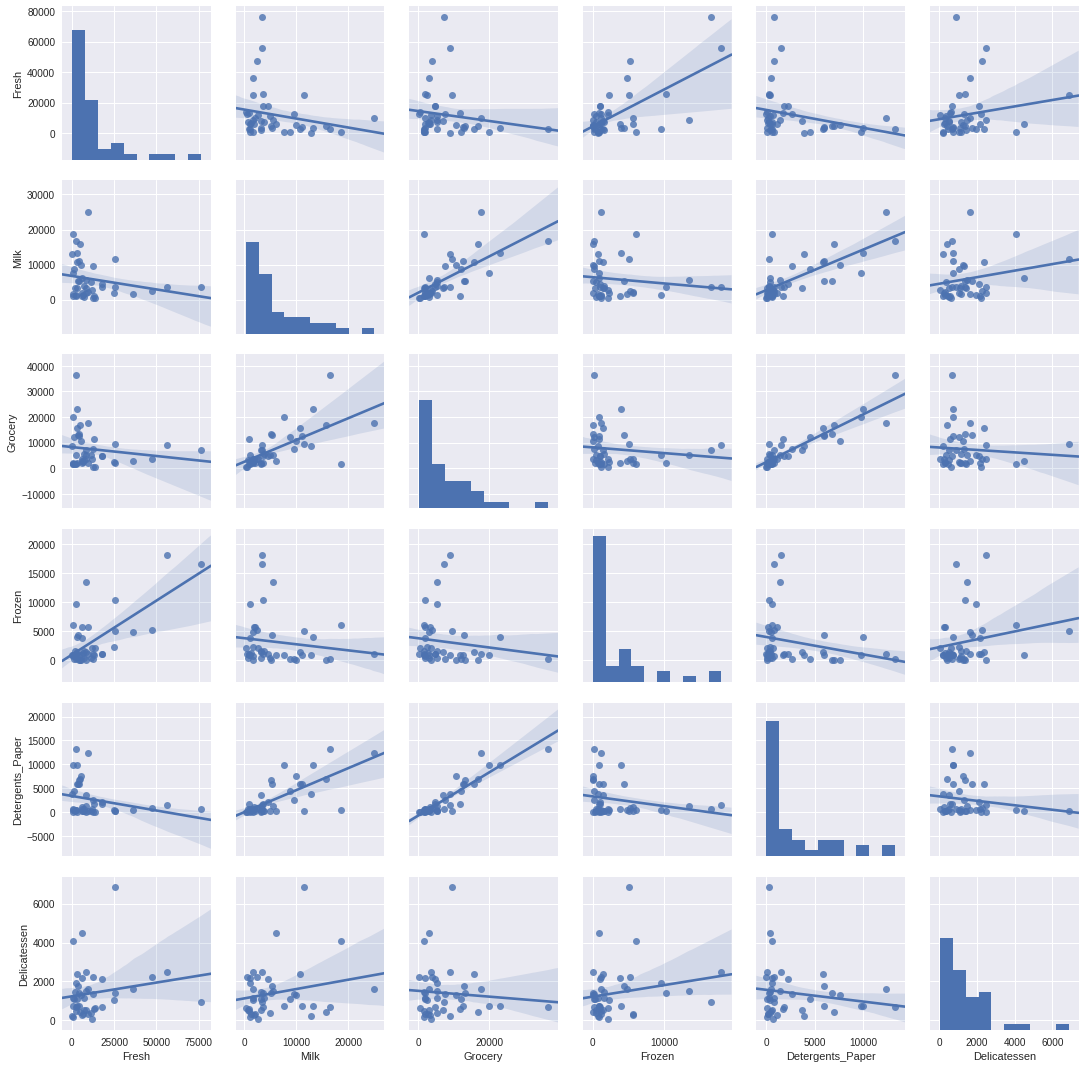

In [47]:
sns.pairplot(sample_10pct_1, kind='reg')